# INTRO TO Simple Perceptrop and MLP

In [ ]:
from torch.optim import Adam, RMSprop
import numpy as np
import torch

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
if True:
    del model

In [ ]:
class MLP(nn.Module):

    
    def __init__(self):
        super(MLP,self).__init__()
        self.h1 = nn.Linear(in_features=1, out_features=5)
        self.h2 = nn.Linear(in_features=5, out_features=8)
        self.out = nn.Linear(in_features=8, out_features=1)

    def forward(self, x):
        x = self.h1(x)
        x = F.leaky_relu(x)
        x = self.h2(x)
        x = F.softmax(x)
        x = self.out(x)
        # x = F.sigmoid(x)
        
        return x

model = MLP()


In [ ]:
x = np.linspace(0,2*np.pi,num=500)
x_tensor = torch.from_numpy(x)
y = np.sin(x)
y_tensor = torch.from_numpy(y)

In [ ]:
opt = Adam(model.parameters(), lr = 0.01)
device = torch.device('cpu')

In [ ]:
model = model.to(device)

In [ ]:
for epoch in range(300):
    tloss = 0
    i = 0
    for _ in range(0,10):
        x_ = x_tensor[i:i+10].reshape(-1,1).to(device).float()
        x_ = x_.reshape(-1,1)
        x_ = x_.to(device).float()
        y_ = y_tensor[i:i+10].reshape(-1,1).to(device).float()
        # print(x_)
        # print('*****************')
        # print(y_)
        i += 10
        out = model(x_)
        # print(out)
        loss = F.l1_loss(out,y_)

        opt.zero_grad()

        loss.backward()
        opt.step()

        kk = loss.item()
        
        tloss += kk
    print(epoch,'===',tloss)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


0 === 4.238245189189911
1 === 3.0779048576951027
2 === 2.5545881763100624
3 === 2.4173691011965275
4 === 2.4338306672871113
5 === 2.473633598536253
6 === 2.493449404835701
7 === 2.4991968981921673
8 === 2.4961445033550262
9 === 2.4853549040853977
10 === 2.477187242358923
11 === 2.467047840356827
12 === 2.4533247761428356
13 === 2.4456688538193703
14 === 2.435595106333494
15 === 2.4102470576763153
16 === 2.3633599802851677
17 === 2.2568867318332195
18 === 2.0042086392641068
19 === 1.690279295668006
20 === 1.3448315262794495
21 === 1.0482599381357431
22 === 0.4077894757501781
23 === 0.8206094950437546
24 === 0.5988427195698023
25 === 0.32833350263535976
26 === 0.4728530324064195
27 === 0.2246705216821283
28 === 0.390213861130178
29 === 0.2937804185785353
30 === 0.26578486035577953
31 === 0.2758266255259514
32 === 0.284582678694278
33 === 0.24049729574471712
34 === 0.23509274749085307
35 === 0.2292516464367509
36 === 0.21469525527209044
37 === 0.23140082834288478
38 === 0.2169041163288056

In [ ]:
y_pred = model(x_tensor.to(device).float().reshape(-1,1)).detach().cpu().numpy()
y_pred = y_pred.reshape(1,-1)[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


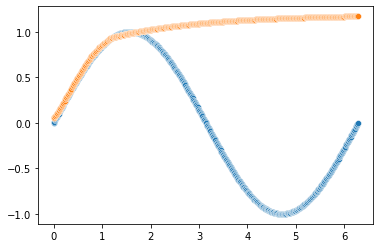

In [ ]:
sns.scatterplot(x=x,y=y)
sns.scatterplot(x=x,y=y_pred)
plt.show()


# AUTOMPG DATASET

In [ ]:
import pandas as pd
device = torch.device('cpu')

In [ ]:
columns = ['mpg','cylinders','disp','hp','weight','acc','model year','origin','carname']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',sep='\s+',names=columns,header=None)
df.shape

(398, 9)

In [ ]:
df.head()

,mpg,cylinders,disp,hp,weight,acc,model year,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
df.replace(['?','_','-',' ','.'],np.nan, inplace=True)

In [ ]:
df.drop(columns=['carname','model year','origin'],inplace=True)

In [ ]:
df.dropna(how='any',inplace=True)

In [ ]:
df = df.astype(np.float64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mpg        392 non-null    float64
 1   cylinders  392 non-null    float64
 2   disp       392 non-null    float64
 3   hp         392 non-null    float64
 4   weight     392 non-null    float64
 5   acc        392 non-null    float64
dtypes: float64(6)
memory usage: 21.4 KB


In [ ]:
X = np.array(df.iloc[:,1:6])
Y = np.array(df.iloc[:,[0]]).reshape(-1,1)
X = torch.from_numpy(X).to(device).float()
Y = torch.from_numpy(Y).to(device).float()

In [ ]:
X.size(), Y.size()

(torch.Size([392, 5]), torch.Size([392, 1]))

In [ ]:
try:
    del model
except:
    pass

In [ ]:
class MLP(nn.Module):

    def __init__(self):
        super(MLP, self).__init__()
        self.h1 = nn.Linear(in_features=5,out_features=8)
        self.out = nn.Linear(in_features=8, out_features=1)

    def forward(self,x):
        x = torch.relu(self.h1(x))
        x = self.out(x)
        return x



model = MLP()
model = model.to(device)

In [ ]:
from torch.optim import Adam
opt = Adam(params=model.parameters(), lr = 0.0001)

In [ ]:
for epoch in range(5000):
    out = model(X)
    loss = F.mse_loss(out,Y)
    loss.backward()
    opt.step()
    opt.zero_grad()

    if epoch % 500 == 0:
        print(loss.item())

29.398731231689453
29.300151824951172
29.198577880859375
29.098039627075195
28.99435043334961
28.888608932495117
28.781068801879883
28.671070098876953
28.559106826782227
28.445709228515625


In [ ]:
y_pred = model(X).detach().cpu().numpy().reshape(1,-1)
y_pred[0][0]

16.60359

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


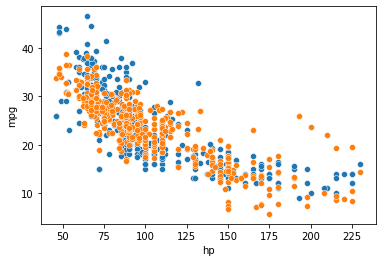

In [ ]:
sns.scatterplot(df['hp'],df['mpg'])
sns.scatterplot(df['hp'],y_pred[0])


# MNIST DATASET CLASSIFICATION WITH DNN

In [ ]:
!wget https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/training.pt
!wget https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/test.pt

--2021-10-28 19:50:15--  https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/training.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47520431 (45M) [application/octet-stream]
Saving to: ‘training.pt’

training.pt         100%[===================>]  45.32M   142MB/s    in 0.3s    

2021-10-28 19:50:19 (142 MB/s) - ‘training.pt’ saved [47520431/47520431]

--2021-10-28 19:50:19--  https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/test.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108

In [ ]:
import torch
from torch.optim import Adam
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
from tqdm.auto import tqdm
from torch.utils.data import DataLoader, TensorDataset
device = torch.device('cpu')

In [ ]:
data = torch.load('training.pt')
x_train, y_train = data
x_train.size(),y_train.size()

(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [ ]:
data = torch.load('test.pt')
x_test, y_test = data
x_test.size(),y_test.size()

(torch.Size([10000, 28, 28]), torch.Size([10000]))

In [ ]:
training_data_loader = DataLoader(TensorDataset(x_train.reshape(-1,28*28),y_train),
                                  batch_size=512,
                                  shuffle=True)

tensor(5)


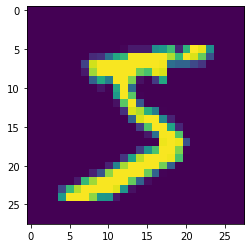

In [ ]:
plt.imshow(x_train[0])
print(y_train[0])

In [ ]:
class MNIST_DNN(nn.Module):

    def __init__(self):

        super(MNIST_DNN,self).__init__()
        self.bn1 = nn.BatchNorm1d(num_features=28*28)
        self.h1 = nn.Linear(in_features=28*28, out_features=128)
        self.bn2 = nn.BatchNorm1d(num_features=128)
        self.h2 = nn.Linear(in_features=128, out_features=256)
        self.out = nn.Linear(in_features=256, out_features=10)

        self.drop = nn.Dropout(p=0.2)

    
    def forward(self,x):

        x = self.bn1(x)
        x = self.h1(x)
        x = F.leaky_relu(x)

        x = self.bn2(x)
        x = self.h2(x)
        x = F.leaky_relu(x)
        x = self.drop(x)

        x = self.out(x)

        return x

In [ ]:
try:
    del model
except:
    print('No previous model')
else:
    print('previous model deleted')
finally:
    model = MNIST_DNN()
    model = model.to(device)

previous model deleted


In [ ]:
opt = Adam(model.parameters(),lr=0.001)

In [ ]:
x_test = x_test.reshape(-1,28*28)

In [ ]:
tq = tqdm(range(100))

l = 0
for i in tq:
    tq.set_description(desc='{}'.format(l))
    training_loss = 0
    test_loss = 0
    for batch , target in training_data_loader:
        batch = batch.float().to(device)
        target = target.to(device)
        opt.zero_grad()

        out = model(batch)
        loss = F.cross_entropy(out,target)

        loss.backward()
        opt.step()
        ll = loss.item()
        training_loss += ll
    l = training_loss 

    test_x = x_test.float().to(device)
    test_y = y_test.to(device)
    out_t = model(test_x)
    loss_t = F.cross_entropy(out_t,test_y)
    test_loss += loss_t.item()
    print(training loss: {0} and test loss: {1}'.format(training_loss,test_loss))


  0%|          | 0/100 [00:00<?, ?it/s]

training loss: 7.788717657327652 and test loss: 0.11976468563079834
training loss: 5.3992276806384325 and test loss: 0.11224871873855591
training loss: 4.011037070304155 and test loss: 0.11813520640134811
training loss: 3.0513035063631833 and test loss: 0.12243825942277908
training loss: 2.4628470623865724 and test loss: 0.13140219449996948
training loss: 2.4341533086262643 and test loss: 0.12208962440490723
training loss: 1.880171311320737 and test loss: 0.13505855202674866
training loss: 1.7180145662277937 and test loss: 0.1403743475675583
training loss: 1.4072171601001173 and test loss: 0.14732980728149414
training loss: 1.264614885672927 and test loss: 0.1385488659143448
training loss: 0.957549104350619 and test loss: 0.1362522691488266
training loss: 0.9493960734689608 and test loss: 0.13904617726802826
training loss: 1.1763493872713298 and test loss: 0.14712181687355042
training loss: 1.1560931983403862 and test loss: 0.14904235303401947
training loss: 1.1317309751175344 and test

In [ ]:
np.argmax(output_test_prob,axis=1)[30]

3

tensor(3)


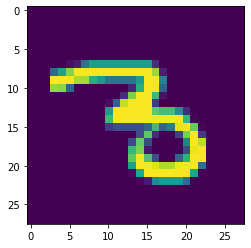

In [ ]:
y_pred = model(x_test.reshape(-1,28*28).float().to(device))
output_test_prob = F.softmax(y_pred, dim=1).detach().cpu().numpy()

plt.show()
plt.imshow(x_train[30])
print(y_train[30])

In [ ]:
confusion_matrix(np.argmax(output_test_prob, axis=1),
                 y_test.detach().cpu().numpy())

array([[ 972,    0,    2,    0,    1,    5,    5,    1,    3,    2],
       [   0, 1125,    5,    0,    0,    0,    1,    6,    2,    2],
       [   1,    2, 1002,    5,    5,    0,    1,    7,    0,    1],
       [   0,    1,    3,  991,    1,    8,    1,    2,    7,    4],
       [   0,    0,    1,    0,  954,    0,    2,    1,    4,   13],
       [   1,    1,    1,    5,    0,  867,    6,    0,   10,    2],
       [   3,    3,    5,    0,    5,    4,  940,    0,    5,    0],
       [   1,    1,    7,    6,    6,    5,    0, 1008,    5,   16],
       [   2,    2,    6,    2,    0,    2,    1,    1,  934,    3],
       [   0,    0,    0,    1,   10,    1,    1,    2,    4,  966]])

In [ ]:
accuracy_score(np.argmax(output_test_prob, axis=1),
                 y_test.detach().cpu().numpy())

0.9769

# CNN ON MNIST

In [ ]:
!wget https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/training.pt
!wget https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/test.pt

--2021-10-28 20:56:09--  https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/training.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47520431 (45M) [application/octet-stream]
Saving to: ‘training.pt’

training.pt         100%[===================>]  45.32M   139MB/s    in 0.3s    

2021-10-28 20:56:09 (139 MB/s) - ‘training.pt’ saved [47520431/47520431]

--2021-10-28 20:56:09--  https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/test.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
from tqdm.auto import tqdm

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = torch.load('training.pt')
x_train, y_train = data

data = torch.load('test.pt')
x_test, y_test = data

In [ ]:
x_train, x_test = x_train.reshape(-1,1,28,28), x_test.reshape(-1,1,28,28)

In [ ]:
train_data_loader = DataLoader(TensorDataset(x_train,y_train), batch_size=512,shuffle=True)

In [ ]:
class MNIST_CNN(nn.Module):

    def __init__(self):

        super(MNIST_CNN,self).__init__()
        self.c1 = None

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3,
                               padding=1,stride=1)
        
        self.maxpool = nn.MaxPool2d(kernel_size=2,stride=2)
        self.bn1 = nn.BatchNorm2d(num_features=16)
        self.drop = nn.Dropout2d(p=0.2)


        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3,
                               padding=1,stride=1)
        self.bn2 = nn.BatchNorm2d(num_features=32)


        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3,
                               padding=1,stride=1)
        self.bn3 = nn.BatchNorm2d(num_features=64)


        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3,
                               padding=1,stride=1)


        self.fc1 = nn.Linear(in_features=1*1*128, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)


    def forward(self, x):

        x = self.conv1(x)
        x = F.relu(x)
        self.c1 = x
        x = self.maxpool(x)
        x = self.bn1(x)

        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.bn2(x)

        x = self.conv3(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.bn3(x)

        x = self.conv4(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.drop(x)
        # print(x.size())

        x = x.view(x.size()[0],-1) # Similar to numpy flatten, Important to flatten the data for dense layer
        x = self.fc1(x)
        x = F.relu(x)
        x = self.drop(x)
        x = self.fc2(x)  # if softmax applied then it will return probabilities values

        return x

In [ ]:
device = torch.device('cpu')

try:
    del model
except:
    print('No model found')
else:
    print('Previous model deleted')
finally:
    model = MNIST_CNN()
    model = model.to(device)
    print('model created')

Previous model deleted
model created


In [ ]:
opt = Adam(params=model.parameters(),lr=0.01)

In [ ]:
epoch = 5
tq = tqdm(range(epoch))

desc = 0
for i in tq:
    tq.set_description(desc=f'epoch: {i} ==> training loss: {desc}    ')
    training_loss = 0
    test_loss = 0
    for batch, target in tqdm(train_data_loader):
        batch = batch.float().to(device)
        target = target.to(device)

        out = model(batch)
        opt.zero_grad
        loss = F.cross_entropy(out,target)
        loss.backward()
        training_loss += loss.item()
        opt.step()

    desc = training_loss

    out_t = model(x_test.float().to(device))
    test_loss = F.cross_entropy(out_t,y_test.to(device))
    print(f'training loss: {training_loss} and  test loss: {test_loss}') 


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

training loss: 2276.4241015911102 and  test loss: 2.8472776412963867


  0%|          | 0/118 [00:00<?, ?it/s]

training loss: 2761.333009958267 and  test loss: 2.749746322631836


  0%|          | 0/118 [00:00<?, ?it/s]

training loss: 318.5346608161926 and  test loss: 2.736936092376709


  0%|          | 0/118 [00:00<?, ?it/s]

training loss: 346.27897119522095 and  test loss: 3.0111336708068848


  0%|          | 0/118 [00:00<?, ?it/s]

training loss: 335.0207839012146 and  test loss: 2.687030792236328


In [ ]:
output_1 = model(x_test[:2].float().to(device))

In [ ]:
np.argmax(torch.softmax(output_1,dim=1).detach().cpu().numpy(), axis=1)

array([7, 7])

In [ ]:
y_test[:2]

tensor([7, 2])

# CATS AND DOGS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms, datasets
import PIL
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import numpy as np

In [ ]:
train_data_path = '/content/drive/MyDrive/Colab Notebooks/DEEPLEARNING_AI/Train/'
test_data_path = '/content/drive/MyDrive/Colab Notebooks/DEEPLEARNING_AI/Test/'

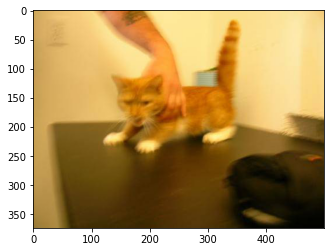

In [ ]:
img_x = PIL.Image.open(train_data_path+'Cat/cat.0.jpg')
plt.imshow(img_x)
plt.show()

In [ ]:
transformers = transforms.Compose(
    [
        transforms.Resize([128,128]),
        transforms.ToTensor()
    ]
)

In [ ]:
train_dataset = datasets.ImageFolder(train_data_path,transform=transformers)
test_dataset = datasets.ImageFolder(test_data_path,transform=transformers)

In [ ]:
train_data_loader = DataLoader(dataset=train_dataset,batch_size=64,shuffle=True)
test_data_loader = DataLoader(dataset=test_dataset,batch_size=64,shuffle=True)

In [ ]:
i = 0
for data, target in train_data_loader:
    print(data[0].shape, target[0].shape)

    print('*'*80)
    print(data[0])
    i += 1

    if i == 1:
        break

torch.Size([3, 128, 128]) torch.Size([])
********************************************************************************
tensor([[[0.4078, 0.4471, 0.5843,  ..., 0.6627, 0.6588, 0.6588],
         [0.5059, 0.5255, 0.5412,  ..., 0.6784, 0.6627, 0.6706],
         [0.5412, 0.5569, 0.5647,  ..., 0.6824, 0.6784, 0.6824],
         ...,
         [0.6157, 0.6157, 0.6118,  ..., 0.3765, 0.3804, 0.3373],
         [0.6078, 0.6078, 0.5922,  ..., 0.3843, 0.3647, 0.3490],
         [0.5765, 0.5882, 0.5451,  ..., 0.3804, 0.3490, 0.3373]],

        [[0.0784, 0.1373, 0.2745,  ..., 0.6667, 0.6627, 0.6627],
         [0.0627, 0.0863, 0.0980,  ..., 0.6824, 0.6667, 0.6745],
         [0.0745, 0.0784, 0.0784,  ..., 0.6863, 0.6824, 0.6863],
         ...,
         [0.5255, 0.5255, 0.5255,  ..., 0.3333, 0.3294, 0.2863],
         [0.5176, 0.5176, 0.5059,  ..., 0.3294, 0.3059, 0.2902],
         [0.5020, 0.5098, 0.4667,  ..., 0.3098, 0.2863, 0.2745]],

        [[0.0667, 0.1294, 0.2667,  ..., 0.6471, 0.6431, 0.6431],
 

In [ ]:
torch.cuda.empty_cache()

## Deep learning model

$$W_o = \frac{W_{in} - K + 2P}{S} + 1$$

$$For\ the\ first\ layer $$ 
$$W_1 = \frac{128 - 5 + 2*2}{1} + 1 = 128$$

`Here we are not reducing the size of the image in the convolution layers, but it can be done by changing the kernel_size, stride or setting a padding`

$$W_{in} = Input\ dim\ of\ image \\ W_o = Output\ dim\ of\ image \\ K = Kernel\ size \\ P = Padding \\ S = Stride$$

In [ ]:
class catsAndDogs(nn.Module):


    def __init__(self):
        super(catsAndDogs,self).__init__()
        self.c1 = None
        """
        Convolution layers:

        in_channels = no. of layers in the image when incoming to the convolution layer
        kernel_size = size of convolution filter (k*k) 
        padding = no. of cells to leave at each size of the image
        stride = the step by which the convolution filter moves, deafult = 1
        out_channels = no. of layers in the image when outgoing from the convolution layer, i.e. no. of filters(convolution layers)


        Batch normalization layers:

        num_features = no. of channels in the image


        Pooling layers:

        kernel_size = the size of the matrix to be considered for taking pooling
        stride = step size taken while moving the kernel

        """

        self.bn1 = nn.BatchNorm2d(num_features=3)
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=16,kernel_size=3, padding=1,stride=1)

        """
        No learning for pooling and dropout layers
        """
        self.maxpool = nn.MaxPool2d(kernel_size=2,stride=2)
        self.drop = nn.Dropout2d(p=0.3)

        self.bn2 = nn.BatchNorm2d(num_features=16)
        self.conv2 = nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3, padding=1,stride=1)

        self.bn3 = nn.BatchNorm2d(num_features=32)
        self.conv3 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3, padding=1,stride=1)

        # self.bn4 = nn.BatchNorm2d(num_features=3)
        # self.conv4 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3, padding=1,stride=1)

        # self.bn5 = nn.BatchNorm2d(num_features=3)
        # self.conv5 = nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3, padding=1,stride=1)

        self.fc1 = nn.Linear(in_features=64*16*16, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=32)
        self.fc3 = nn.Linear(in_features=32, out_features=2)
    

    def forward(self,x):

        x = self.bn1(x)
        x = self.conv1(x)
        x = F.relu(x)
        self.c1 = x
        x = self.maxpool(x)

        x = self.bn2(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)

        x = self.bn3(x)
        x = self.conv3(x)
        x = F.relu(x)
        x = self.maxpool(x)

        x = x.view(x.size()[0],-1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)

        # x = F.softmax(x) # Does this required ?
        return x


In [ ]:
device = torch.device('cpu')

try:
    del model
except:
    print('No model found')
else:
    print('Previous model deleted')
finally:
    model = catsAndDogs()
    model = model.to(device)
    print('model created')

Previous model deleted
model created


In [ ]:
# Train and validation Method

def train(train_dataloader:DataLoader,
          model:nn.Module,
          optimizer:torch.optim.Optimizer,
          epoch_idx:int):
    
    training_loss = np.array([])
    training_accuracy = np.array([])

    for train_idx, (data, target) in enumerate(tqdm(train_dataloader)):

        data = data.to(device)
        target = target.to(device)

        out = model(data)
        loss = F.cross_entropy(out,target)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        training_loss = np.append(training_loss, loss.item())

        out_prob = F.softmax(out)
        pred = out_prob.argmax(axis=1)
        correct = pred.cpu().eq(target.cpu()).sum()
        acc = float(correct)/float(len(target))

        training_accuracy = np.append(training_accuracy,acc)

        if train_idx%100 == 0:
            print(f"Training epoch {epoch_idx} Training loss: {loss.item()} Training accuracy: {acc}")

    return training_loss.sum(), training_accuracy.mean()

In [ ]:
def validate(test_dataloader:DataLoader,
             model:nn.Module):
    
    val_loss = np.array([])
    val_accuracy = np.array([])

    for val_idx, (data, target) in enumerate(test_dataloader):

        data = data.to(device)
        target = target.to(device)

        out = model(data)
        loss = F.cross_entropy(out,target)


        val_loss = np.append(val_loss, loss.item())

        out_prob = F.softmax(out)
        pred = out_prob.argmax(axis=1)
        correct = pred.cpu().eq(target.cpu()).sum()
        acc = float(correct)/float(len(target))

        val_accuracy = np.append(val_accuracy,acc)

        if val_idx%100 == 0:
            print(f"Validation loss: {loss.item()} Validation accuracy: {acc}")

    return val_loss.sum(), val_loss.mean()

In [ ]:
# Model training and evaluation
training_perf = []
validation_perf = []
optimizer = Adam(params = model.parameters(), lr=0.001)


for epoch in tqdm(range(10)):
    train_loss, train_acc = train(train_dataloader=train_data_loader, model = model, optimizer=optimizer, epoch_idx=epoch)
    val_loss, val_acc = validate(test_dataloader=test_data_loader, model = model)

    training_perf.append((train_loss, train_acc))
    validation_perf.append((val_loss, val_acc))

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Training epoch 0 Training loss: 0.6111360192298889 Training accuracy: 0.671875


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Validation loss: 0.5762143731117249 Validation accuracy: 0.75


  0%|          | 0/29 [00:00<?, ?it/s]

Training epoch 1 Training loss: 0.5761741399765015 Training accuracy: 0.6875
Validation loss: 0.5435149669647217 Validation accuracy: 0.734375


  0%|          | 0/29 [00:00<?, ?it/s]

Training epoch 2 Training loss: 0.5442204475402832 Training accuracy: 0.6875
Validation loss: 0.3827785551548004 Validation accuracy: 0.84375


  0%|          | 0/29 [00:00<?, ?it/s]

Training epoch 3 Training loss: 0.40693485736846924 Training accuracy: 0.8125
Validation loss: 0.35879582166671753 Validation accuracy: 0.859375


  0%|          | 0/29 [00:00<?, ?it/s]

Training epoch 4 Training loss: 0.37835994362831116 Training accuracy: 0.859375
Validation loss: 0.2873409688472748 Validation accuracy: 0.8125


  0%|          | 0/29 [00:00<?, ?it/s]

Training epoch 5 Training loss: 0.30932873487472534 Training accuracy: 0.8125
Validation loss: 0.4155654013156891 Validation accuracy: 0.78125


  0%|          | 0/29 [00:00<?, ?it/s]

Training epoch 6 Training loss: 0.4213915169239044 Training accuracy: 0.765625
Validation loss: 0.21587887406349182 Validation accuracy: 0.921875


  0%|          | 0/29 [00:00<?, ?it/s]

Training epoch 7 Training loss: 0.2331600785255432 Training accuracy: 0.890625
Validation loss: 0.17808707058429718 Validation accuracy: 0.96875


  0%|          | 0/29 [00:00<?, ?it/s]

Training epoch 8 Training loss: 0.19601726531982422 Training accuracy: 0.890625
Validation loss: 0.10215432196855545 Validation accuracy: 0.96875


  0%|          | 0/29 [00:00<?, ?it/s]

Training epoch 9 Training loss: 0.09361539781093597 Training accuracy: 0.984375
Validation loss: 0.09193636476993561 Validation accuracy: 0.96875


# Transfer learning using ResNet model

In [ ]:
from torchvision.models import resnet50
base_model = resnet50(pretrained=True, progress=False)

c:\Users\ADMIN\Documents\Codebase\envs\machine_L\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\ADMIN\Documents\Codebase\envs\machine_L\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\Users\ADMIN\Documents\Codebase\envs\machine_L\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [ ]:
for param in base_model.parameters():
    print(param.size())
    param.requires_grad=False           #Freezing the weight parameters of the resnet model so that they are not updated during training

torch.Size([64, 3, 7, 7])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 1, 1])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([256, 64, 1, 1])
torch.Size([256])
torch.Size([256])
torch.Size([256, 64, 1, 1])
torch.Size([256])
torch.Size([256])
torch.Size([64, 256, 1, 1])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([256, 64, 1, 1])
torch.Size([256])
torch.Size([256])
torch.Size([64, 256, 1, 1])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([256, 64, 1, 1])
torch.Size([256])
torch.Size([256])
torch.Size([128, 256, 1, 1])
torch.Size([128])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([512, 128, 1, 1])
torch.Size([512])
torch.Size([512])
torch.Size([512, 256, 1, 1])
torch.Size([512])
torch.Size([512])
torch.Size([128, 512, 1, 1])
torch.Size([128])
torch.Siz

In [ ]:
in_features = base_model.fc.in_features

In [ ]:
in_features

2048

In [ ]:
list(base_model.children())

[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(inplace=True),
 MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False),
 Sequential(
   (0): Bottleneck(
     (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
     (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (downsample): Sequential(
       (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
       (1): BatchNorm2d(256, eps=1e-05, momentum

In [ ]:
new_model_modules = list(base_model.children())[:-1]        #Taking all the layers except the last fully connected layer, because we are using 3 FC layers with different no. of class outputs
new_model = torch.nn.Sequential(*new_model_modules)
new_model = new_model.to(device)

In [ ]:
class resnetcatsanddogs(torch.nn.Module):

    def __init__(self):

        super(resnetcatsanddogs, self).__init__()
        
        self.fc1 = torch.nn.Linear(in_features=in_features, out_features=128*2)     # Here the in_features are the no. of outputs of the 2nd last layers of the resnet50 model
        self.fc2 = torch.nn.Linear(in_features = 128*2, out_features = 64*2)
        self.fc3 = torch.nn.Linear(in_features=64*2, out_features=2)

    def forward(self,x):

        x = new_model(x)            # The resnet50 model upto the 2nd last layer

        x = x.view(x.size()[0],-1)  # Flattening

        x = self.fc1(x)             # CNN -> DNN
        x = F.relu(x)
    
        x = self.fc2(x)
        x = F.relu(x)

        x = self.fc3(x)
        x = F.relu(x)
        x = F.softmax(x, dim=1)

        return x


resnet50model = resnetcatsanddogs()

# Train and test functions

In [ ]:
def train(
    train_dataloader: DataLoader,  #Changed from train_data_loader
    model: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    epoch_idx: int):

    #model.train()

    training_loss = np.array([])
    training_accuracy = np.array([])

    for train_idx, (data, target) in enumerate(train_dataloader):
        
        data = data.to(device)
        target = target.to(device)
        
        output_prob = model(data)
        loss = F.cross_entropy(output_prob, target)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        training_loss = np.append(training_loss, loss.item())
        
        pred = output_prob.argmax(axis=1)
        correct = pred.cpu().eq(target.cpu()).sum()
        acc = float(correct)/float(len(target))
        training_accuracy = np.append(training_accuracy, acc)

        if train_idx %100 == 0:
            print(f"Training epoch {epoch_idx} Training loss: {loss.item()} Training accuracy: {acc}")

    return training_loss.mean(), training_accuracy.mean()





def validate(
    test_dataloader : DataLoader,
    model: torch.nn.Module):
    
    #model.eval()

    val_loss = np.array([])
    val_accuracy = np.array([])

    for val_idx, (data_test, target_test) in enumerate(test_dataloader):
        data_test = data_test.to(device)
        target_test = target_test.to(device)

        output_prob_test = model(data_test)

        loss_test = F.cross_entropy(output_prob_test, target_test)
        val_loss = np.append(val_loss, loss_test.item())

        pred_test = output_prob_test.argmax(axis=1)
        correct_test = pred_test.cpu().eq(target_test.cpu()).sum()
        acc_test = float(correct_test)/float(len(target_test))
        val_accuracy = np.append(val_accuracy,acc_test)

        if val_idx%100 == 0:
            print(f"Validation loss: {loss_test.item()} Validation accuracy: {acc_test}")

    return val_loss.mean(), val_accuracy.mean()        


# ResNet model testing

In [ ]:
training_perf = []
validation_perf = []

model = resnet50model.to(device)
optimizer = Adam(params = model.parameters(), lr=0.001)

for epoch in range(10):
    train_loss, train_acc = train(train_dataloader=train_data_loader, model = model, optimizer=optimizer, epoch_idx=epoch)
    val_loss, val_acc = validate(test_dataloader=test_data_loader, model = model)

    training_perf.append((train_loss, train_acc))
    validation_perf.append((val_loss, val_acc))

Training epoch 0 Training loss: 0.6931470632553101 Training accuracy: 0.59375
Validation loss: 0.6931470632553101 Validation accuracy: 1.0
Training epoch 1 Training loss: 0.6931470632553101 Training accuracy: 0.484375
Validation loss: 0.6931470632553101 Validation accuracy: 1.0
Training epoch 2 Training loss: 0.6931470632553101 Training accuracy: 0.53125
Validation loss: 0.6931470632553101 Validation accuracy: 1.0
Training epoch 3 Training loss: 0.6931470632553101 Training accuracy: 0.5
Validation loss: 0.6931470632553101 Validation accuracy: 1.0
Training epoch 4 Training loss: 0.6931470632553101 Training accuracy: 0.546875
Validation loss: 0.6931470632553101 Validation accuracy: 1.0
Training epoch 5 Training loss: 0.6931470632553101 Training accuracy: 0.375
Validation loss: 0.6931470632553101 Validation accuracy: 1.0
Training epoch 6 Training loss: 0.6931470632553101 Training accuracy: 0.609375
Validation loss: 0.6931470632553101 Validation accuracy: 1.0
Training epoch 7 Training loss

# DNN AUTO ENCODER

In [ ]:
!wget https://github.com/MorvanZhou/PyTorch-Tutorial/raw/master/tutorial-contents-notebooks/mnist/processed/training.pt

--2021-10-29 00:13:21--  https://github.com/MorvanZhou/PyTorch-Tutorial/raw/master/tutorial-contents-notebooks/mnist/processed/training.pt
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/training.pt [following]
--2021-10-29 00:13:21--  https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/training.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47520431 (45M) [application/octet-stream]
Saving to: ‘training.pt’

training.pt         100%[===================>]

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
# from torchvision import transforms, datasets
# import PIL
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import numpy as np

In [ ]:
x_train, y_train = torch.load('training.pt')
x_train = x_train.float()
x_train = x_train.reshape(-1,28*28)  # Important. Do this here and not inside loop i.e. (batch.reshape(..))

In [ ]:
x_train.shape, y_train.shape

(torch.Size([60000, 784]), torch.Size([60000]))

In [ ]:
train_data_loader = DataLoader(TensorDataset(x_train,x_train),batch_size=128, shuffle=True)

In [ ]:
class autoEncode(nn.Module):

    def __init__(self):

        super(autoEncode, self).__init__()
        # self.bn1 = nn.BatchNorm2d(num_features=28*28)
        self.en_fc1 = nn.Linear(in_features=28*28,out_features=128)
        self.en_fc2 = nn.Linear(in_features=128,out_features=256)
        self.en_fc3 = nn.Linear(in_features=256,out_features=25)

        self.de_fc1 = nn.Linear(in_features=25,out_features=256)
        self.de_fc2 = nn.Linear(in_features=256,out_features=128)
        self.de_fc3 = nn.Linear(in_features=128,out_features=28*28)


    def encoder(self,x):

        x = self.en_fc1(x)
        x = F.relu(x)
        x= self.en_fc2(x)
        x = F.relu(x)
        x= self.en_fc3(x)
        x = F.relu(x)

        return x

    
    def decoder(self,x):

        x = self.de_fc1(x)
        x = F.relu(x)
        x= self.de_fc2(x)
        x = F.relu(x)
        x= self.de_fc3(x)
        x = F.relu(x)

        return x 

    def forward(self,x):

        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
device = torch.device('cpu')
try:
    del model
except:
    print('No model found')
else:
    print('model deleted')
finally:
    model = autoEncode()
    model = model.to(device)
    print('model instantiated')

model deleted
model instantiated


In [ ]:
opt = Adam(model.parameters(), lr=0.001)

In [ ]:
def train(model:nn.Module,
          data_loader:DataLoader,
          optimizer = torch.optim.Optimizer):
    
    model.train()
    training_loss = 0.0
    for batch,target in data_loader:
        batch = batch.to(device)
        target = target.to(device)

        out = model(batch)
        loss = F.mse_loss(out/255,target/255)
        loss.backward()
        opt.step()
        opt.zero_grad()

        training_loss += loss.item()

    return training_loss

In [ ]:
tq = tqdm(range(37))

training_loss = []

desc = 0
for epoch in tq:
    tq.set_description(desc=f'training loss {desc}     |')
    t_loss = train(model=model,data_loader=train_data_loader, optimizer=opt)
    training_loss.append(t_loss)
    desc = t_loss
    if (epoch+1) in [5,10,15,20,25,50,55,75,105,250,300,400,550,600,750,800,850,900,950,1000,1100,1200,1300,1500,1700,1800,1950,2000]:
        print('epoch: ',epoch+1, 'training_loss: ',training_loss[epoch])

  0%|          | 0/37 [00:00<?, ?it/s]

epoch:  5 training_loss:  7.78396952431649
epoch:  10 training_loss:  7.681132068857551
epoch:  15 training_loss:  7.603182698599994
epoch:  20 training_loss:  7.529727151617408
epoch:  25 training_loss:  7.473126131109893


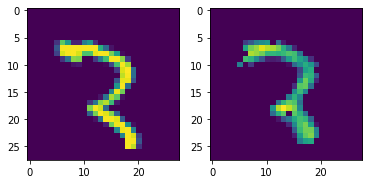

In [ ]:
index = 500
plt.figure(figsize=(6,14))
plt.subplot(121)
plt.imshow(x_train[index].reshape(28,28))
plt.subplot(122)
plt.imshow(model(x_train[index].float().to(device)).detach().cpu().numpy().reshape(28,28))
plt.show()

In [ ]:
model.encoder(x_train[index].float().to(device))

tensor([690.5579, 370.1202, 312.8164, 524.8813,   0.0000,   0.0000, 635.2734,
        863.9130, 896.6096, 331.2693, 288.4486, 427.3430,  13.2084,   0.0000,
        212.2908,   0.0000, 395.0901, 399.9066, 858.1096,   0.0000,   0.0000,
          0.0000,   0.0000, 790.7642, 214.0469], grad_fn=<ReluBackward0>)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE()

In [ ]:
data_reduced = model.encoder(x_train.float().to(device))

In [ ]:
tsne_mat = tsne.fit_transform(data_reduced.detach().cpu().numpy()[:1000,:])

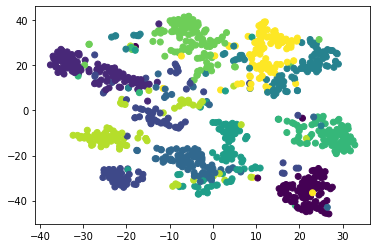

In [ ]:
plt.scatter(tsne_mat[:,0], tsne_mat[:,1],c=y_train.numpy()[:1000])
plt.show()

# Noise removal (CNN AUTO ENCODER)

In [ ]:
!wget https://github.com/MorvanZhou/PyTorch-Tutorial/raw/master/tutorial-contents-notebooks/mnist/processed/training.pt

--2021-10-29 00:58:37--  https://github.com/MorvanZhou/PyTorch-Tutorial/raw/master/tutorial-contents-notebooks/mnist/processed/training.pt
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/training.pt [following]
--2021-10-29 00:58:37--  https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/training.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47520431 (45M) [application/octet-stream]
Saving to: ‘training.pt’

training.pt         100%[=================

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
# from torchvision import transforms, datasets
# import PIL
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import numpy as np

In [ ]:
x_train, y_train = torch.load('training.pt')

In [ ]:
x_train[:2]

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)

In [ ]:
def salt_n_pepper_noise(x):
    return x + torch.rand(x.size())

def gaussian_noise(x):
    return x + torch.normal(0,0.15,size=x.size())

def normalize(x):
    return (x-x.min())/(x.max()-x.min())

In [ ]:
x_train_norm = normalize(x_train)

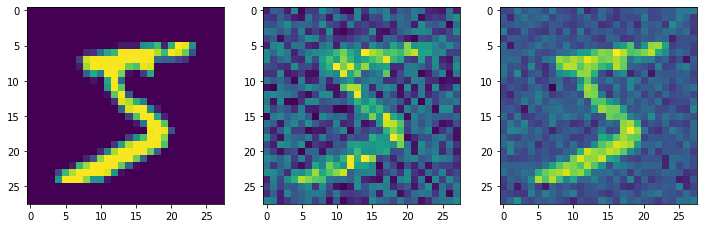

In [ ]:
idx = 0
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(x_train_norm[idx])
plt.subplot(1,3,2)
plt.imshow(salt_n_pepper_noise(x_train_norm[idx]))
plt.subplot(1,3,3)
plt.imshow(gaussian_noise(x_train_norm[idx]))


In [ ]:
class AE_CNN(nn.Module):

    def __init__(self):

        super(AE_CNN,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.convt1 = nn.ConvTranspose2d(in_channels=64, out_channels=32, 
                                         kernel_size=2,padding=0,stride=2)
        self.convt2 = nn.ConvTranspose2d(in_channels=32, out_channels=1, 
                                         kernel_size=2, padding=0,stride=2)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    

    def encoder(self,x):

        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        # print(x.size())

        return x


    def decoder(self, x):

        x = self.convt1(x)
        x = F.relu(x)
        x = self.convt2(x)
        x = F.relu(x)

        return x

    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)

        return x

In [ ]:
ae_cnn_model = AE_CNN()

In [ ]:
sample_img = x_train_norm[0]
sample_img = sample_img.reshape(-1,1,28,28)
# ae_cnn_model(sample_img)

In [ ]:
device = torch.device('cuda')

In [ ]:
ae_target = x_train_norm.reshape(-1,1,28,28)
ae_train = salt_n_pepper_noise(x_train_norm).reshape(-1,1,28,28)

In [ ]:
train_loader = DataLoader(TensorDataset(ae_train, ae_target), batch_size=64, shuffle=True)

In [ ]:
opt = Adam(ae_cnn_model.parameters(), lr=0.001)

In [ ]:
ae_cnn__model = ae_cnn_model.to(device)

In [ ]:
max_epochs = 50

for epoch in tqdm(range(max_epochs)):
    training_loss = 0.0

    for batch, target in train_loader:
        batch = batch.to(device)
        target = target.to(device)

        opt.zero_grad()

        output = ae_cnn_model(batch)
        loss = F.mse_loss(output, target)
        loss.backward()

        training_loss += loss.item()
        opt.step()

    if (epoch+1)%5:
        print("Training loss: ",training_loss)

  0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
  2%|▏         | 1/50 [00:10<08:30, 10.42s/it]

Training loss:  50.57551060989499


  4%|▍         | 2/50 [00:20<08:05, 10.11s/it]

Training loss:  42.46276589855552


  6%|▌         | 3/50 [00:30<07:50, 10.01s/it]

Training loss:  37.351125944405794


  8%|▊         | 4/50 [00:40<07:37,  9.95s/it]

Training loss:  37.01504489034414


 12%|█▏        | 6/50 [00:59<07:15,  9.91s/it]

Training loss:  6.156059650704265


 14%|█▍        | 7/50 [01:09<07:05,  9.90s/it]

Training loss:  5.845595871564001


 16%|█▌        | 8/50 [01:19<06:55,  9.89s/it]

Training loss:  5.693278030026704


 18%|█▊        | 9/50 [01:29<06:45,  9.89s/it]

Training loss:  5.595886900555342


 22%|██▏       | 11/50 [01:49<06:25,  9.89s/it]

Training loss:  5.469524255022407


 24%|██▍       | 12/50 [01:59<06:16,  9.90s/it]

Training loss:  5.420692593790591


 26%|██▌       | 13/50 [02:09<06:06,  9.89s/it]

Training loss:  5.383702283259481


 28%|██▊       | 14/50 [02:18<05:56,  9.90s/it]

Training loss:  5.345784303732216


 32%|███▏      | 16/50 [02:38<05:36,  9.90s/it]

Training loss:  5.272511232178658


 34%|███▍      | 17/50 [02:48<05:26,  9.90s/it]

Training loss:  5.240803041495383


 36%|███▌      | 18/50 [02:58<05:16,  9.90s/it]

Training loss:  5.2176582319661975


 38%|███▊      | 19/50 [03:08<05:07,  9.91s/it]

Training loss:  5.195421890821308


 42%|████▏     | 21/50 [03:28<04:47,  9.92s/it]

Training loss:  5.155637677758932


 44%|████▍     | 22/50 [03:38<04:37,  9.92s/it]

Training loss:  5.136290153488517


 46%|████▌     | 23/50 [03:48<04:27,  9.93s/it]

Training loss:  5.118983386084437


 48%|████▊     | 24/50 [03:58<04:18,  9.95s/it]

Training loss:  5.108953615650535


 52%|█████▏    | 26/50 [04:18<03:59,  9.97s/it]

Training loss:  5.0818060473538935


 54%|█████▍    | 27/50 [04:28<03:49,  9.98s/it]

Training loss:  5.066831453703344


 56%|█████▌    | 28/50 [04:38<03:39,  9.98s/it]

Training loss:  5.05781922955066


 58%|█████▊    | 29/50 [04:48<03:29,  9.97s/it]

Training loss:  5.048383772838861


 62%|██████▏   | 31/50 [05:08<03:09,  9.99s/it]

Training loss:  5.029920365661383


 64%|██████▍   | 32/50 [05:18<02:59,  9.99s/it]

Training loss:  5.019411398563534


 66%|██████▌   | 33/50 [05:28<02:49, 10.00s/it]

Training loss:  5.010416696313769


 68%|██████▊   | 34/50 [05:38<02:39, 10.00s/it]

Training loss:  5.005222929175943


 72%|███████▏  | 36/50 [05:58<02:20, 10.00s/it]

Training loss:  4.99072067020461


 74%|███████▍  | 37/50 [06:08<02:09, 10.00s/it]

Training loss:  4.98296407982707


 76%|███████▌  | 38/50 [06:18<01:59,  9.99s/it]

Training loss:  4.980653361417353


 78%|███████▊  | 39/50 [06:28<01:49,  9.98s/it]

Training loss:  4.970962296240032


 82%|████████▏ | 41/50 [06:47<01:29,  9.96s/it]

Training loss:  4.963167530950159


 84%|████████▍ | 42/50 [06:57<01:19,  9.95s/it]

Training loss:  4.960241459775716


 86%|████████▌ | 43/50 [07:07<01:09,  9.95s/it]

Training loss:  4.954115871340036


 88%|████████▊ | 44/50 [07:17<00:59,  9.93s/it]

Training loss:  4.9504223903641105


 92%|█████████▏| 46/50 [07:37<00:39,  9.93s/it]

Training loss:  4.939625726081431


 94%|█████████▍| 47/50 [07:47<00:29,  9.93s/it]

Training loss:  4.938877534586936


 96%|█████████▌| 48/50 [07:57<00:19,  9.92s/it]

Training loss:  4.940898044966161


 98%|█████████▊| 49/50 [08:07<00:09,  9.92s/it]

Training loss:  4.931453314609826


100%|██████████| 50/50 [08:17<00:00,  9.95s/it]


In [ ]:
sample_img_gpu = ae_train[:2].to(device)

In [ ]:
denoised_img = ae_cnn_model(sample_img_gpu).detach().cpu().numpy()

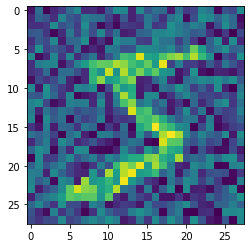

In [ ]:
plt.imshow(ae_train[0][0])

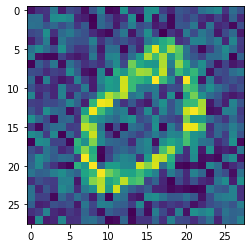

In [ ]:
plt.imshow(ae_train[1][0])

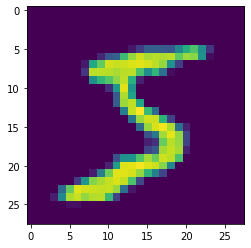

In [ ]:
plt.imshow(denoised_img[0][0])

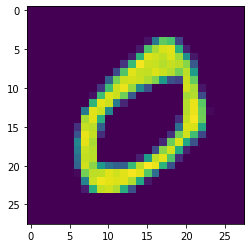

In [ ]:
plt.imshow(denoised_img[1][0])

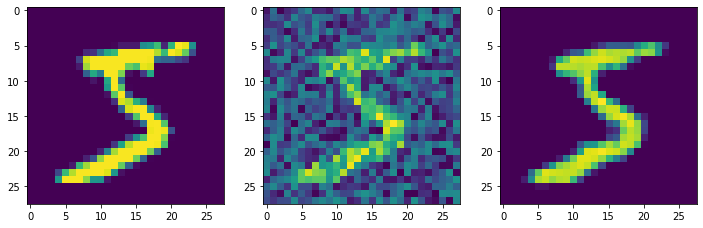

In [ ]:
idx = 0
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(x_train_norm[idx])

plt.subplot(1,3,2)
plt.imshow(ae_train[idx][0])

plt.subplot(1,3,3)
plt.imshow(denoised_img[idx][0])
plt.show()